# Decision Trees and Random Forests

Last time we learned the basics of `R` as well as interacting with our data and vizualizing key aspects and features.

This week we will focus on the basics of prediction/classification using decision trees/random forests.

Lets start by reading in the training set and removing all rows with missing values

In [5]:
train = read.csv("../train.csv", header = T)
train.n = train[complete.cases(train),]
head(train.n)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


Next, for simplicity to run the decision tree algorithm, we will remove all columns from `train.n` with non-numerical or noncategorical values . 

The way we do that is by setting the column equal to `NULL`. 

In [9]:
train.n.numeric.col = train.n #first lets make a copy of our data since we are removing columns 
train.n.numeric.col$Name = NULL #removes the Name column
head(train.n.numeric.col)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,female,35,1,0,113803,53.1000,C123,S
5,5,0,3,male,35,0,0,373450,8.0500,,S
7,7,0,1,male,54,0,0,17463,51.8625,E46,S


In [10]:
train.n.numeric.col[,c(8,10)]  = NULL
## What is this doing? 

Now lets make `Sex` and `Embarked` columns in train to numeric categories. 

For example lets code `female` to equal `1` and  `male` to equal `2` 

We accomplish this by first telling R that the `Sex` column is actually a category, not a string of characters using the `as.factor()` function

In [12]:
train.n.numeric.col$Sex = as.factor(train.n.numeric.col$Sex) 
class(train.n.numeric.col$Sex) ##class tells us the type of column Sex is 

[1] "factor"

Next to code `female` =1 and `male` = 2 we can use the `as.numeric()` function 

In [14]:
train.n.numeric.col$Sex = as.numeric(train.n.numeric.col$Sex)
head(train.n.numeric.col)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,3,2,22,1,0,7.2500,S
2,2,1,1,1,38,1,0,71.2833,C
3,3,1,3,1,26,0,0,7.9250,S
4,4,1,1,1,35,1,0,53.1000,S
5,5,0,3,2,35,0,0,8.0500,S
7,7,0,1,2,54,0,0,51.8625,S


Now try to do this for the Embarked column

In [15]:
train.n.numeric.col$Embarked = as.numeric(as.factor(train.n.numeric.col$Embarked)) ## see what I did here? 

Now one more housekeeping thing, notice how the `PassengerId` column is redudant with the row names, lets do something about it. 

In [55]:
row.names(train.n.numeric.col) = train.n.numeric.col$PassengerId
train.n.numeric.col$PassengerId = NULL ##Why do I do this? 

Lets have a look at the final dataframe, notice that some of the rownames are skipped and everything is a number, why is that?

In [56]:
head(train.n.numeric.col, 20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,2,22,1,0,7.2500,4
2,1,1,1,38,1,0,71.2833,2
3,1,3,1,26,0,0,7.9250,4
4,1,1,1,35,1,0,53.1000,4
5,0,3,2,35,0,0,8.0500,4
7,0,1,2,54,0,0,51.8625,4
8,0,3,2,2,3,1,21.0750,4
9,1,3,1,27,0,2,11.1333,4
10,1,2,1,14,1,0,30.0708,2
11,1,3,1,4,1,1,16.7000,4


# Using this data lets try to build a model to predict `Survived` from the features
For this exercise we will be experiementing with <font color=red>Decision Trees</font>
## Why <font color=red>Decision Trees</font>? 
Lets look at the data: notice that some features are __categorical__ while others are __continuous__

Next notice that most of the features are not on the same __scale__ as each other. To vizualize this, lets plot some histograms of the features using the `hist()` function 


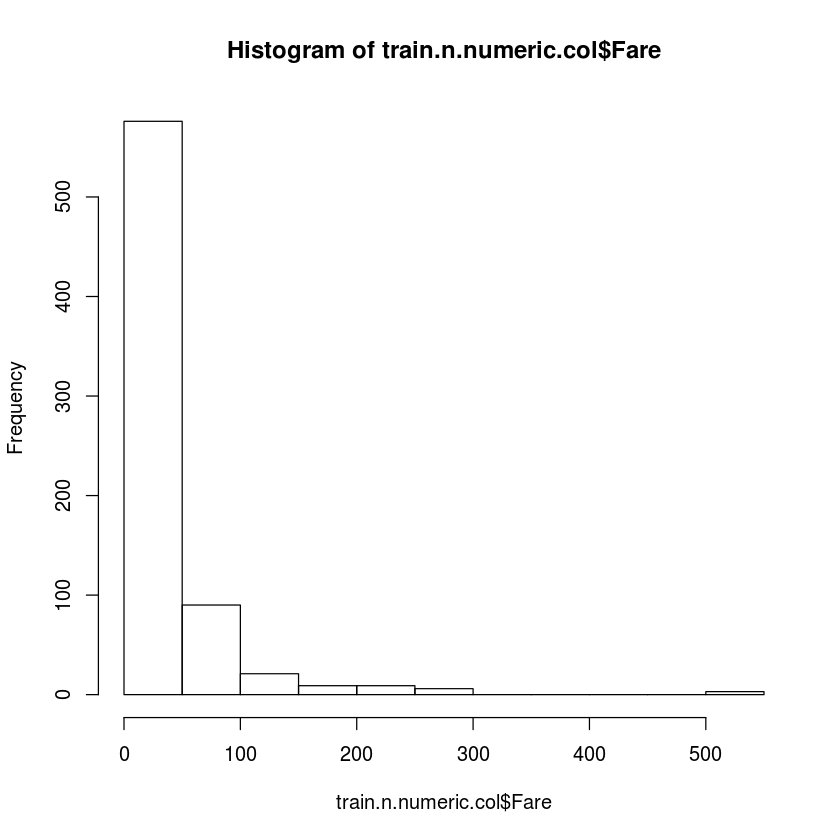

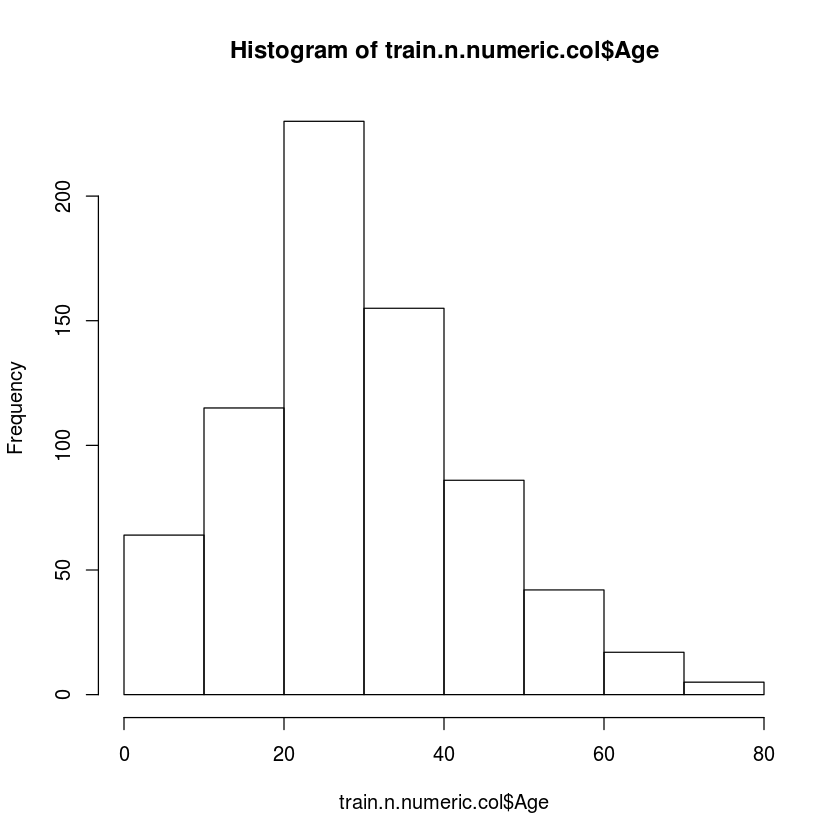

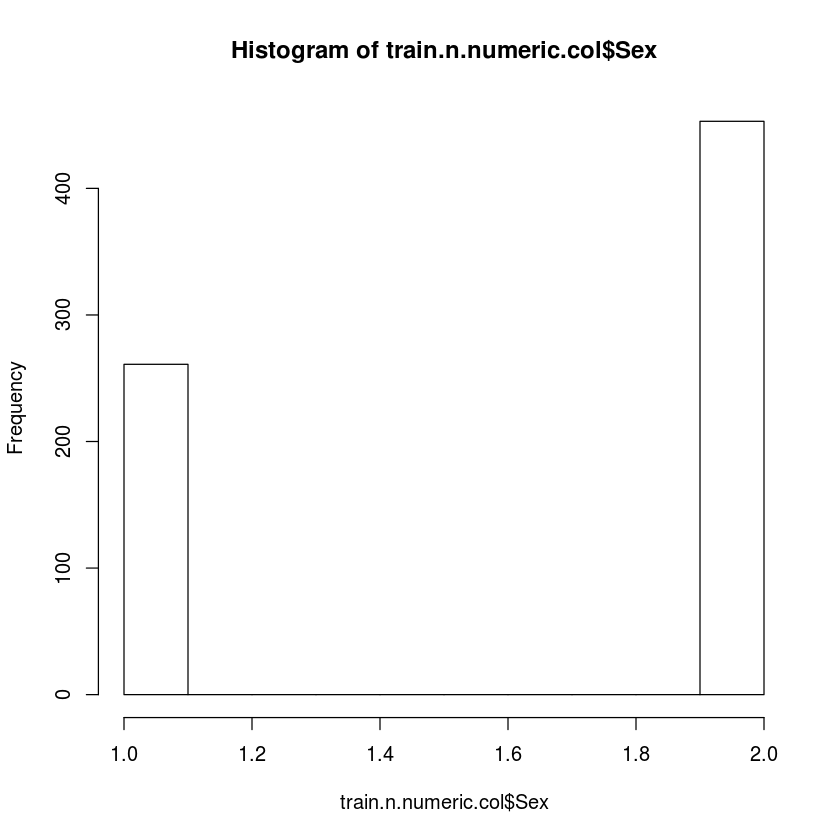

In [57]:
hist(train.n.numeric.col$Fare)
hist(train.n.numeric.col$Age)
hist(train.n.numeric.col$Sex)

We will get into data _standardization_ or _normalization_ (which means to bring all the features into the same scale) later, but for now the <font color=red>Decision Tree</font> algorithm is robust enough to handle our __mixed__ data. 

Lets go into a bit about what is a decision tree

# <font color=red>Decision Tree</font> Basics

Think of a decision tree as a series of rules in order to categorize our data: 

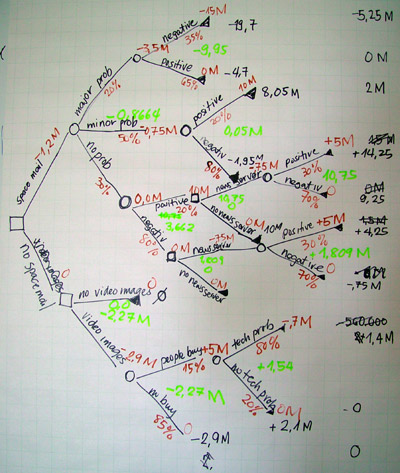  (shamelessly stolen from wikipedia) 



## <font color=green>Intuitively, what basic rules can you think of that can classify our data?</font>

Based on intuition alone it is hard to think of heuristics to organize and stratify our data. 

When we impliment a decision tree in R, it uses principals from __information theory__ specifically the ideas of the _shannon entropy_, _information gain_ and _gain ratios_ in order to categorize our data. 
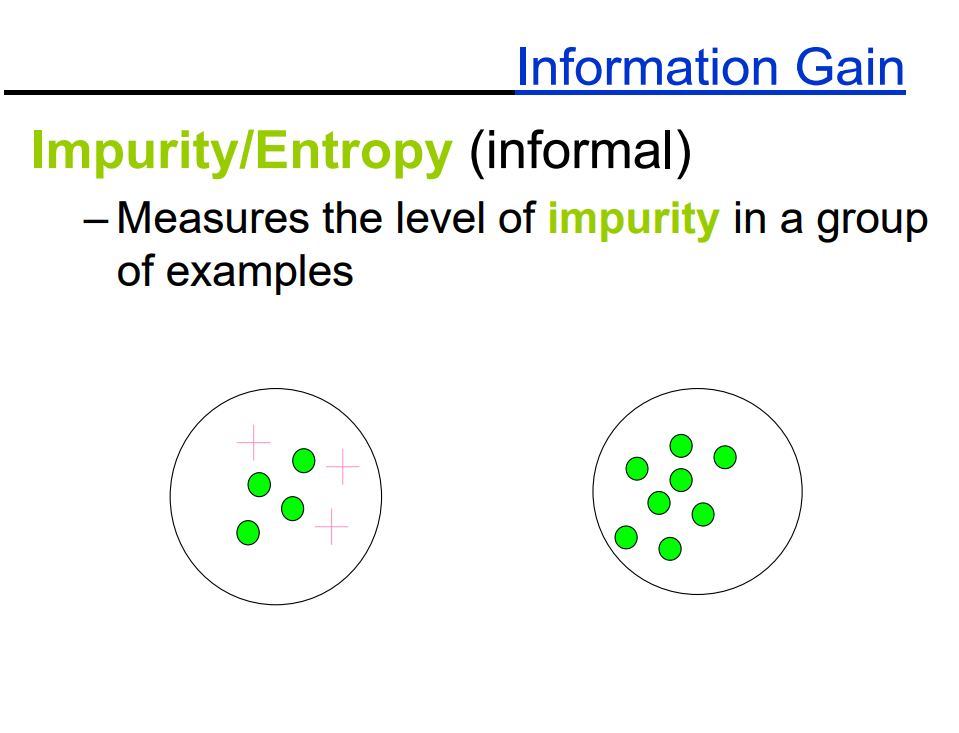 ( adapted from https://courses.cs.washington.edu/courses/cse455/10au/notes/InfoGain.pdf)


The Shannon entropy of a system is, or the amount of _information_ in system, is obtained using this formula:

$ entropy =  Σ -p_i*log2(p_i) $

where `i` is a class and `p` is the probablity of the class 

When the probablity of a class is 1, meaning that everything is part of one circle, what is the entropy of the system? 



In [58]:
-1*log2(1) 

[1] 0

This means that there is no information in this group (everything is the same) 

Lets solve the entropy for our data:

In [59]:
p_survived_rows = which(train.n.numeric.col$Survived == 1) ##this gives us a vector rows where Survived = 1
p_died_rows =  which(train.n.numeric.col$Survived == 0) ##this gives us a vector rows where Survived = 1
p_survived_counts = length(p_survived_rows) ##this gives us the counts of survivors 
p_died_counts = length(p_died_rows) ##this gives us counts of people who died 
p_survived = p_survived_counts / (p_survived_counts + p_died_counts) ## probablity of survival based on this dataset
p_died = p_died_counts / (p_survived_counts + p_died_counts) ## probablity of death based on this dataset
p_survived
p_died

[1] 0.4061625

[1] 0.5938375

In [60]:
entropy = (-1*p_survived*log2(p_survived)) + (-1*p_died*log2(p_died))
entropy

[1] 0.9744415

What this means, is that our data is very impure (glass half empty), or rich in information (glass half full). Which makes sense since theres are a bunch of survived and a bunch of dead examples.   
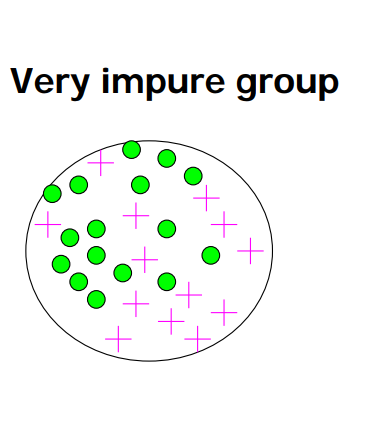 ( adapted from https://courses.cs.washington.edu/courses/cse455/10au/notes/InfoGain.pdf)

## The goal of a decision tree, then, is to partition our data to using __rules__ to get groups of very low information (very high purity). 

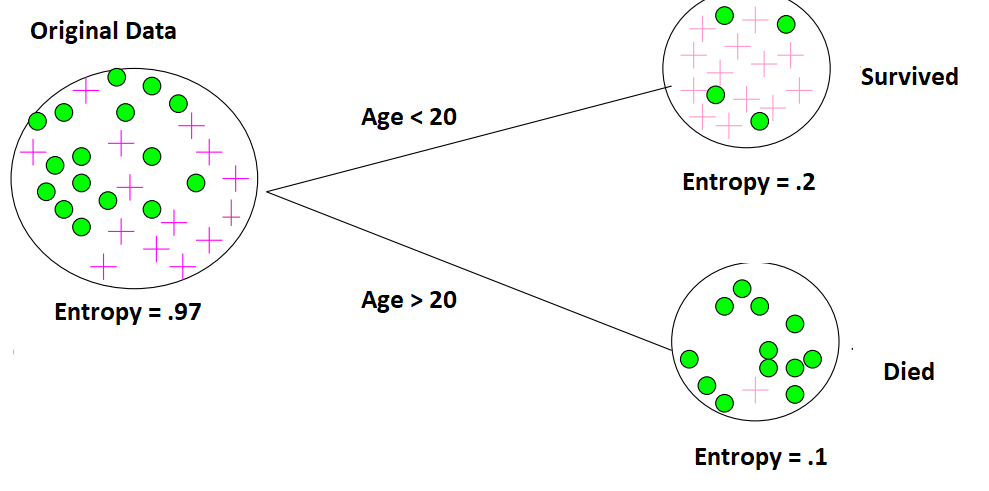
( adapted from https://courses.cs.washington.edu/courses/cse455/10au/notes/InfoGain.pdf)

__information gain__ and __gain ratio__ are ways to see how well a split/partition classifies data based on a rule, they also can tell us the ___importance of a feature___ in predicting a class

$ information gain = parent entropy - average child entropy  $

This in above example the information gain is 
$.97 - (.2 + .1)/2 = .82 $ which means we gained a lot of information after this split. 

__gain ratio__ controls for bias from __information gain__ by taking into account the number and size of the resulting branches. 

### Lets run a decision tree on our data

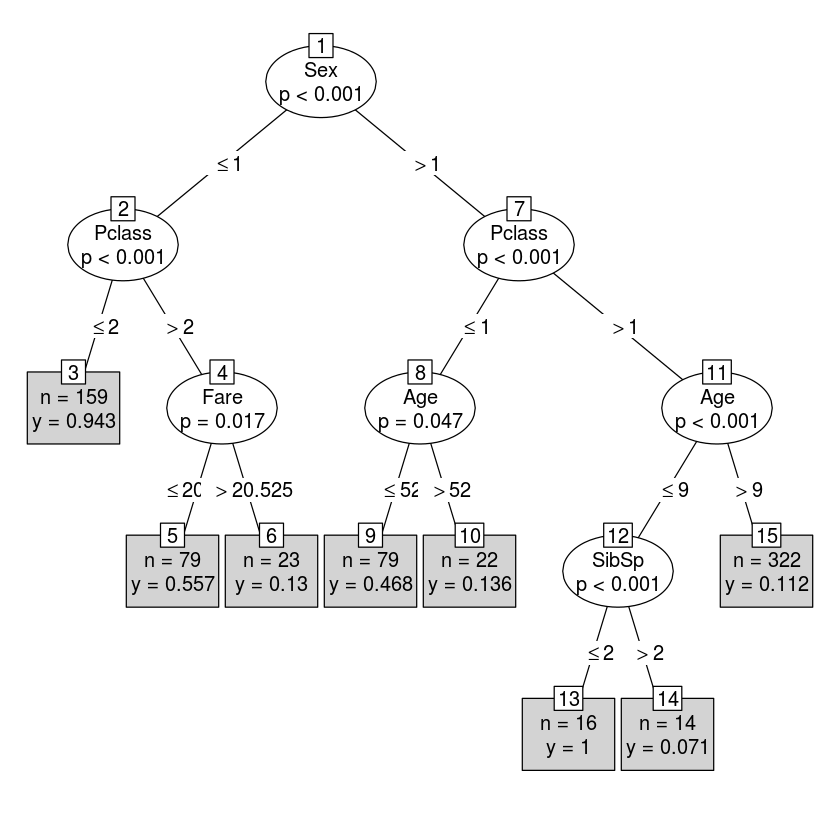

In [93]:
##lets load the decsion tree package 
## if you do not have the package you may need to run install.packages('party')
library(party)
set.seed(20)
dtree = ctree(Survived ~ . , data = train.n.numeric.col ) ## here the syntax means predict survived using ( ~) all features (.)
plot(dtree, type="simple")


Cool we just ran our first ML algorithm, now how do we know that it is good or bad at classifying things? 

Try to mark up the following code and try to see whats happening

In [82]:
train.500 = train.n.numeric.col[1:500,] 
train.500$Survived = as.factor(train.500$Survived)
train.test = train.n.numeric.col[501:nrow(train.n.numeric.col), ]
train.test.survived  = as.factor(train.test$Survived )
train.test$Survived = NULL
dtree = ctree(Survived ~ . , data = train.500 ) 
predicted =  as.factor(predict(object = dtree, train.test, type = "response" ))
confusionMatrix(predicted, train.test.survived  )


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 128  35
         1   3  48
                                          
               Accuracy : 0.8224          
                 95% CI : (0.7645, 0.8712)
    No Information Rate : 0.6121          
    P-Value [Acc > NIR] : 2.246e-11       
                                          
                  Kappa : 0.5976          
 Mcnemar's Test P-Value : 4.934e-07       
                                          
            Sensitivity : 0.9771          
            Specificity : 0.5783          
         Pos Pred Value : 0.7853          
         Neg Pred Value : 0.9412          
             Prevalence : 0.6121          
         Detection Rate : 0.5981          
   Detection Prevalence : 0.7617          
      Balanced Accuracy : 0.7777          
                                          
       'Positive' Class : 0               
                                          

So we got a 82% classification accuracy. Fairly meh. Lets see if we can do better using a `Random Forest` 

When we run a decision tree, R randomly goes through the features and tries to look for the best partition based on the __whole data__, this generates but a _single tree_.

### What if we create a decision tree not on the whole data, but on ___random subsets___ ; like how we separated a training and test set? That way each tree explains a part of the data 

That way we can create hundreds of decision trees, almost like -


wait for it ...


___a forest!___ 

### This is the basic idea of a `random forest` algorithm: 
#### 1) Create random partitions of the dataset 
#### 2) Train a decision tree on each random partition 
#### 3) When given an example to classify, ask each tree what it believe's the classification to be ( 1 tree one vote) 
#### 4) Tally the votes 
#### 5) Majority of the votes assigns the class for the example! 

Lets try it out using the `randomForest` package

In [67]:
library(randomForest)
rforest = randomForest(Survived ~ . , data = train.500  ,  ntree = 1000) #notice the ntree option 
predicted =  as.factor(predict(object = rforest, train.test, type = "response" ))
confusionMatrix(predicted, train.test.survived  )


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 120  23
         1  11  60
                                          
               Accuracy : 0.8411          
                 95% CI : (0.7851, 0.8874)
    No Information Rate : 0.6121          
    P-Value [Acc > NIR] : 2.291e-13       
                                          
                  Kappa : 0.6563          
 Mcnemar's Test P-Value : 0.05923         
                                          
            Sensitivity : 0.9160          
            Specificity : 0.7229          
         Pos Pred Value : 0.8392          
         Neg Pred Value : 0.8451          
             Prevalence : 0.6121          
         Detection Rate : 0.5607          
   Detection Prevalence : 0.6682          
      Balanced Accuracy : 0.8195          
                                          
       'Positive' Class : 0               
                                          

Lets also look at the most important features

In [74]:
rforest$importance

,MeanDecreaseGini
Pclass,19.645778
Sex,58.200226
Age,36.731383
SibSp,9.219004
Parch,7.828837
Fare,39.790307
Embarked,5.973389


At face value it may not seem like a large improvement, but there is a signifigant improvement.

_Hint: look at true positive rate for predicting 1 between the ctree method and the randomforest method (specificity)_   

## Going forward, how can we improve our classification? 

## Next time: Feature extraction and filling in missing data